## Setup

Load Libraries

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [48]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [49]:
from yellowbrick.cluster import KElbowVisualizer

In [50]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

Load Dataset

In [51]:
heart_disease=pd.read_csv('heart dataset.csv')
heart_disease.info()
heart_disease.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [52]:
heart_disease.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [53]:
heart_disease.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# Visualization

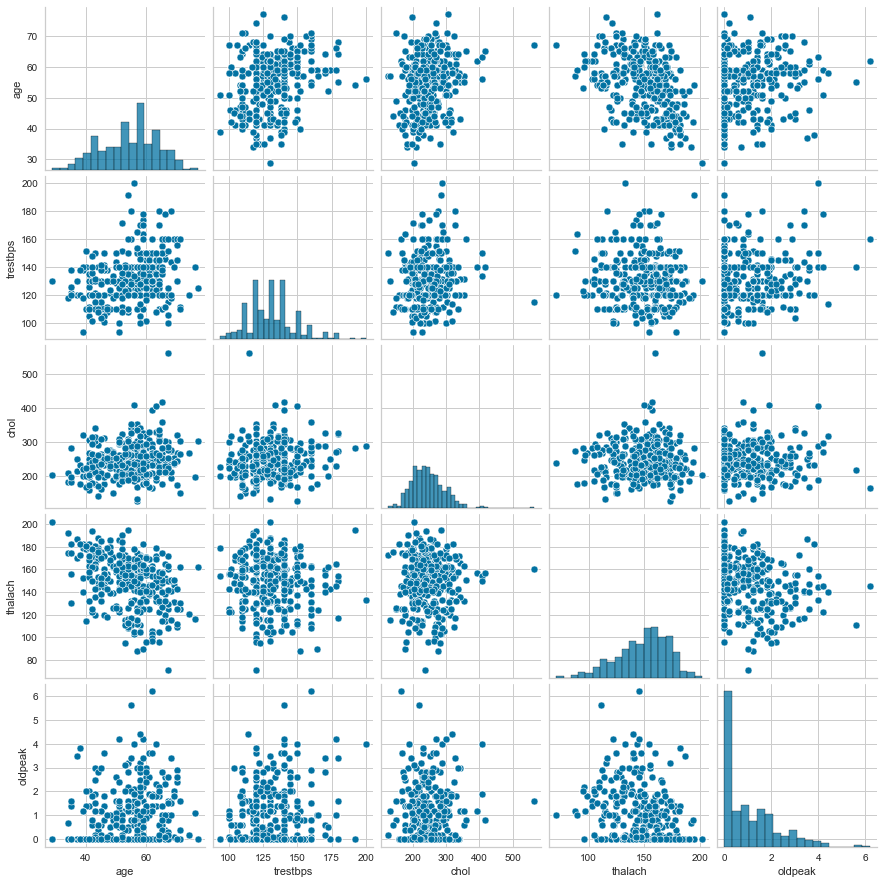

In [54]:
sns.pairplot(data=heart_disease.iloc[:, [0,3,4,7,9]])
plt.show()

In [86]:
labels = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak'  
]

In [56]:
labels2drop = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'
]

In [57]:
heart_disease.drop((labels2drop), axis=1, inplace=True)

In [58]:
heart_disease

,age,trestbps,chol,thalach,oldpeak,target
0,52,125,212,168,1.0,0
1,53,140,203,155,3.1,0
2,70,145,174,125,2.6,0
3,61,148,203,161,0.0,0
4,62,138,294,106,1.9,0
...,...,...,...,...,...,...
1020,59,140,221,164,0.0,1
1021,60,125,258,141,2.8,0
1022,47,110,275,118,1.0,0
1023,50,110,254,159,0.0,1


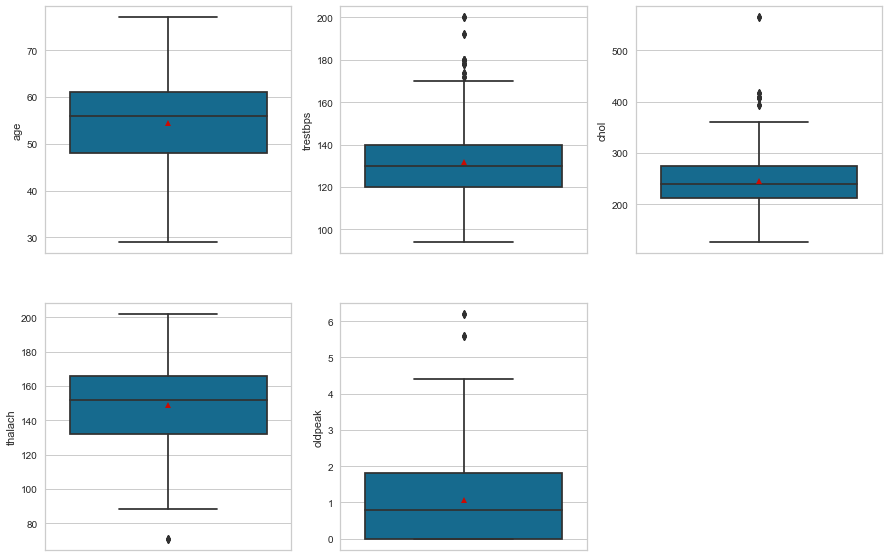

In [87]:
plt.figure(figsize=(15, 10))
for plot in range(len(labels)):
    plt.subplot(2, 3, plot+1)
    sns.boxplot(y=heart_disease[labels[plot]], showmeans=True)
plt.show()

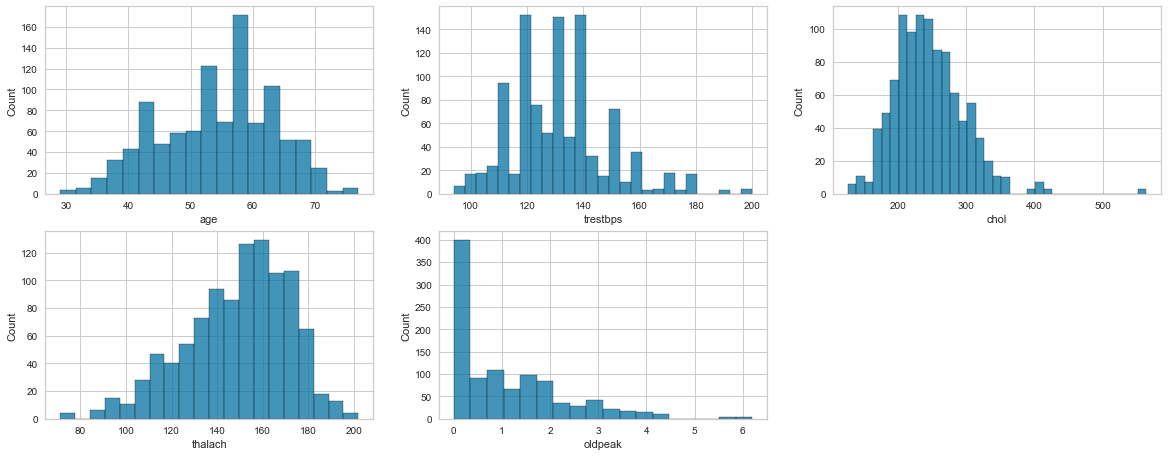

In [88]:
plt.figure(figsize=(20, 20))

for plot in range(5):
    plt.subplot(5, 3, plot+1)
    sns.histplot(data=heart_disease, x=heart_disease.iloc[:, plot])
plt.show()

## Dimensionality Reduction

In [61]:
X=heart_disease.drop('target', axis=1)

In [62]:
# Scaling the Dataset

sc=StandardScaler()
X_scaled=sc.fit_transform(heart_disease)

In [63]:
X_scaled

array([[-0.26843658, -0.37763552, -0.65933209,  0.82132052, -0.06088839,
        -1.02669772],
       [-0.15815703,  0.4791073 , -0.83386117,  0.2559679 ,  1.72713707,
        -1.02669772],
       [ 1.71659547,  0.76468824, -1.39623266, -1.04869198,  1.30141672,
        -1.02669772],
       ...,
       [-0.81983438, -1.23437834,  0.56237149, -1.35311262, -0.06088839,
        -1.02669772],
       [-0.4889957 , -1.23437834,  0.15513696,  0.42992256, -0.91232909,
         0.97399651],
       [-0.04787747, -0.66321646, -1.12474297, -1.57055593,  0.27968789,
        -1.02669772]])

T-SNE

In [64]:
# Reducing the variables to a desired count

heart_diseaseReducer=TSNE(n_components=2, random_state=50)
heart_diseaseReduced=heart_diseaseReducer.fit_transform(X_scaled)
tsne_components=pd.DataFrame(heart_diseaseReduced, columns=['tsne1', 'tsne2'])
tsne_components.head()


C:\Users\Olufunmi\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Olufunmi\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


,tsne1,tsne2
0,8.181540,-46.669315
1,-27.122765,-16.115700
2,-31.568653,-20.915411
3,14.235588,-41.482849
4,-36.781830,-39.478218


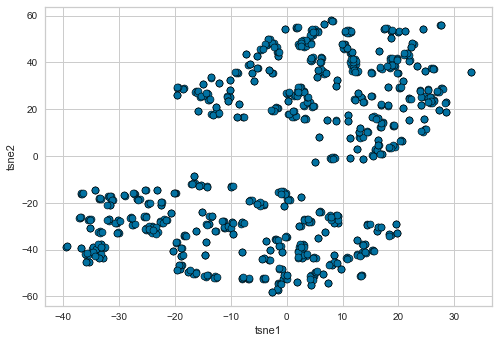

In [65]:
sns.scatterplot(x=tsne_components.tsne1, y=tsne_components.tsne2, edgecolor='black')
plt.show()

# KMeans

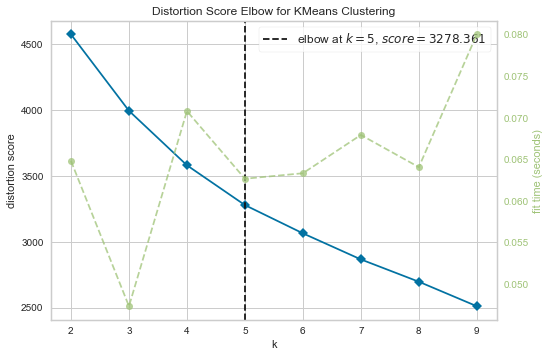

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [69]:
#To get the optimal clusters

model=KMeans()
visualizer=KElbowVisualizer(model, k=(2,10))

visualizer.fit(X_scaled)
visualizer.show()

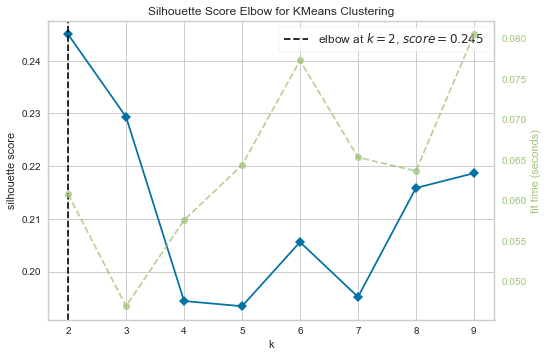

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [70]:
#To get the optimal clusters

model=KMeans()
visualizer=KElbowVisualizer(model, k=(2,10), metric='silhouette')

visualizer.fit(X_scaled)
visualizer.show()

In [71]:
cluster=KMeans(n_clusters=2, random_state=0)
heart_clusters=cluster.fit_predict(X_scaled)

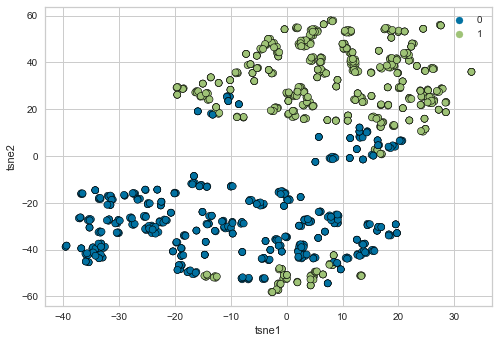

In [72]:
sns.scatterplot(x=tsne_components.tsne1, y=tsne_components.tsne2, edgecolor='black', hue=heart_clusters)
plt.show()

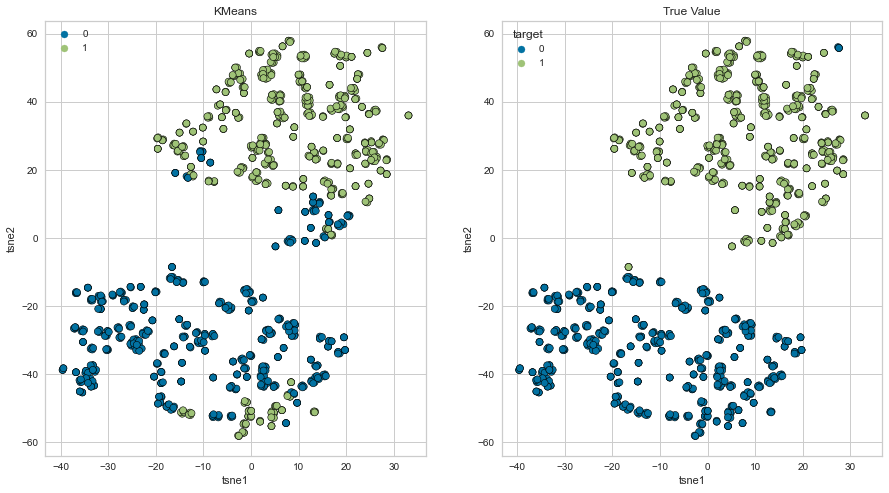

In [74]:
## Comparing the performance of the KMeans model with the True Value using T-SNE

plt.figure(figsize=(15,8))

plt.subplot(121)
sns.scatterplot(x=tsne_components.tsne1, y=tsne_components.tsne2, edgecolor='black', hue=heart_clusters)
plt.title('KMeans')

plt.subplot(122)
sns.scatterplot(x=tsne_components.tsne1, y=tsne_components.tsne2, edgecolor='black', hue=heart_disease.target)
plt.title('True Value')

plt.show()

# HEIRARCHICAL CLUSTERING

In [78]:
heart_hei = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
heart_clustershei=heart_hei.fit_predict(X_scaled)

In [79]:
np.unique(heart_clustershei, return_counts=True)

(array([0, 1], dtype=int64), array([572, 453], dtype=int64))

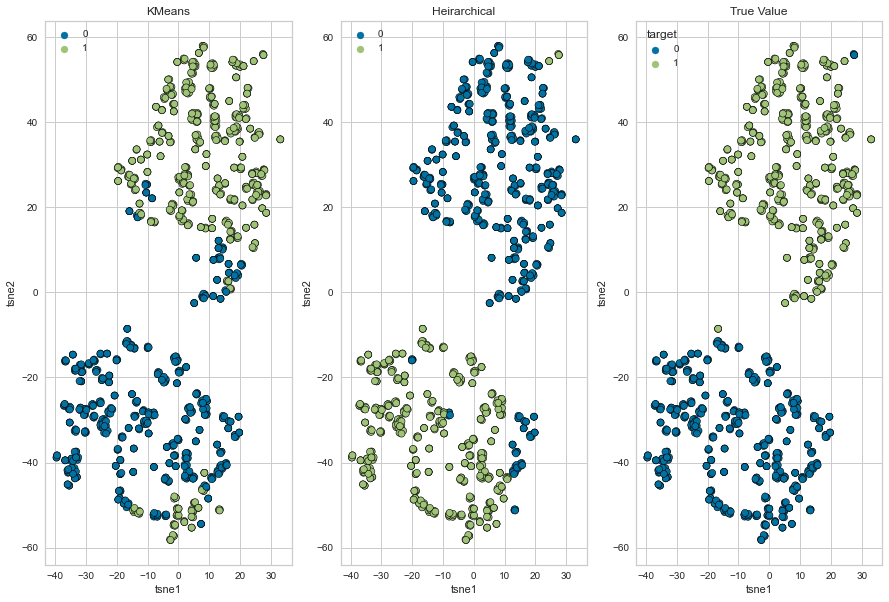

In [91]:
## Comparing the performance of the KMeans and Heirarchical models with the True Value using T-SNE

plt.figure(figsize=(15,10))

plt.subplot(131)
sns.scatterplot(x=tsne_components.tsne1, y=tsne_components.tsne2, edgecolor='black', hue=heart_clusters)
plt.title('KMeans')

plt.subplot(132)
sns.scatterplot(x=tsne_components.tsne1, y=tsne_components.tsne2, edgecolor='black', hue=heart_clustershei)
plt.title('Heirarchical')

plt.subplot(133)
sns.scatterplot(x=tsne_components.tsne1, y=tsne_components.tsne2, edgecolor='black', hue=heart_disease.target)
plt.title('True Value')

plt.show()

In [82]:
### Checking silhouette value for KMeans and Heirarchical clustering

sil_kmeans=metrics.silhouette_score(X, heart_clusters)
sil_hei=metrics.silhouette_score(X, heart_clustershei)

print(f'Silhouette Score\n===========')
print(f'KMeans: {sil_kmeans}')
print(f'Heirarchical: {sil_hei}')

Silhouette Score
KMeans: 0.10686329184289008
Heirarchical: 0.054056360434047296


In [84]:
###Checking Homogeneity score for KMeans and Heirarchical Clustering

hom_kmeans=metrics.homogeneity_score((heart_disease.target).values, heart_clusters)
hom_hei=metrics.homogeneity_score((heart_disease.target).values, heart_clustershei)

print(f'Homogeneity Score\n===========')
print(f'KMeans: {hom_kmeans}')
print(f'Heirarchical: {hom_hei}')


Homogeneity Score
KMeans: 0.42788840647588366
Heirarchical: 0.7096875581706313


In [85]:
###Checking Completeness score for KMeans and Heirarchical Clustering

comp_kmeans=metrics.completeness_score((heart_disease.target).values, heart_clusters)
comp_hei=metrics.completeness_score((heart_disease.target).values, heart_clustershei)

print(f'Completeness Score\n===========')
print(f'KMeans: {comp_kmeans}')
print(f'Heirarchical: {comp_hei}')


Completeness Score
KMeans: 0.4276815546285942
Heirarchical: 0.7163125864313289
